## 주가 예측 
- 참고링크 : https://github.com/mrafayaleem/equity-portfolio-prediction/blob/master/generating_portfolio.ipynb

In [ ]:
!pip install finance-datareader
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 38.1 MB/s eta 0:00:00


In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import TensorBoard

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import FinanceDataReader as fdr
import koreanize_matplotlib

## 상위 30개 주식 종목 데이터 Dictionary에 저장

In [ ]:
fdr.StockListing('KOSPI')[:30]

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,65100,2,-300,-0.46,65600,65700,64700,9791064,637046767248,388632844005000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,564000,2,-3000,-0.53,563000,571000,560000,244181,137592002000,131976000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,88700,2,-1100,-1.22,88900,89600,87500,1794303,158558052768,64573809775500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,797000,1,22000,2.84,771000,799000,771000,144462,114475902000,56725678000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,731000,1,5000,0.69,727000,735000,724000,149664,109184505000,51603002733000,70592343,STK
5,006400,KR7006400006,삼성SDI,KOSPI,,684000,3,0,0.00,681000,692000,675000,174917,119737103000,47034938520000,68764530,STK
6,005935,KR7005931001,삼성전자우,KOSPI,,54600,2,-700,-1.27,54900,55200,54600,872720,47796872300,44929613820000,822886700,STK
7,005380,KR7005380001,현대차,KOSPI,,199200,2,-1800,-0.90,200000,201000,197400,472704,93871604800,42137075995200,211531506,STK
8,000270,KR7000270009,기아,KOSPI,,85900,2,-600,-0.69,86200,86700,85700,649435,55920637100,34820711507300,405363347,STK
9,035420,KR7035420009,NAVER,KOSPI,,196100,1,3500,1.82,191100,197300,189000,900385,174279721400,32170025568500,164049085,STK


In [ ]:
top30 = fdr.StockListing('KOSPI')[:30][:30][['Code', 'Name']]

In [ ]:
# 상위 10개 정목 2022년 1월 1일부터 시계열 데이터 수집 
# 감정분석 데이터에 따라서 달라짐 
# 가장 최근 수집된 감정 분석 결과에 따라 2022년 6월 10일 수집
stocks_data = {}
for i, stock_code in enumerate(fdr.StockListing('KRX')[:30]['Code']):
    df = fdr.DataReader(stock_code, '2022-06-10')
    stocks_data[list(top30['Name'])[i]] = df

In [ ]:
# 삼성전자 2022년 6월 10일부터 23년 5월 1일까지 
stocks_data['삼성전자']

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-06-10,64000,64400,63800,63800,22193552,-0.021472
2022-06-13,62400,62800,62100,62100,22157816,-0.026646
2022-06-14,61200,62200,61100,61900,24606419,-0.003221
2022-06-15,61300,61500,60200,60700,26811224,-0.019386
2022-06-16,61300,61800,60500,60900,23394895,0.003295
...,...,...,...,...,...,...
2023-04-27,64100,65000,63300,64600,14779601,0.007800
2023-04-28,65200,65900,65000,65500,19699481,0.013932
2023-05-02,66000,66300,65100,65700,14396948,0.003053


In [ ]:
기아_감정점수 = pd.read_csv('/content/기아_감정점수.csv', index_col='날짜')
기아_감정점수 = 기아_감정점수[기아_감정점수.index > '2022-06-09']
기아_감정점수.index = pd.to_datetime(기아_감정점수.index)
stocks_data['기아'] = pd.merge(stocks_data['기아'], 기아_감정점수, left_index=True, right_index=True)
stocks_data['기아'] = stocks_data['기아'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]

In [ ]:
삼성물산_감정점수 = pd.read_csv('/content/삼성물산_감정점수.csv', index_col='날짜')
삼성물산_감정점수 = 삼성물산_감정점수[삼성물산_감정점수.index > '2022-06-09']
삼성물산_감정점수.index = pd.to_datetime(삼성물산_감정점수.index)
stocks_data['삼성물산'] = pd.merge(stocks_data['삼성물산'], 삼성물산_감정점수, left_index=True, right_index=True)
stocks_data['삼성물산'] = stocks_data['삼성물산'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]

In [ ]:
삼성바이오로직스_감정점수 = pd.read_csv('/content/삼성바이오로직스_감정점수.csv', index_col='날짜')
삼성바이오로직스_감정점수 = 삼성바이오로직스_감정점수[삼성바이오로직스_감정점수.index > '2022-06-09']
삼성바이오로직스_감정점수.index = pd.to_datetime(삼성바이오로직스_감정점수.index)
stocks_data['삼성바이오로직스'] = pd.merge(stocks_data['삼성바이오로직스'], 삼성바이오로직스_감정점수, left_index=True, right_index=True)
stocks_data['삼성바이오로직스'] = stocks_data['삼성바이오로직스'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]

In [ ]:
삼성전자우_감정점수 = pd.read_csv('/content/삼성전자우_감정점수.csv', index_col='날짜')
삼성전자우_감정점수 = 삼성전자우_감정점수[삼성전자우_감정점수.index > '2022-06-09']
삼성전자우_감정점수.index = pd.to_datetime(삼성전자우_감정점수.index)
stocks_data['삼성전자우'] = pd.merge(stocks_data['삼성전자우'], 삼성전자우_감정점수, left_index=True, right_index=True)
stocks_data['삼성전자우'] = stocks_data['삼성전자우'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]

In [ ]:
삼성화재_감정점수 = pd.read_csv('/content/삼성화재_감정점수.csv', index_col='날짜')
삼성화재_감정점수 = 삼성화재_감정점수[삼성화재_감정점수.index > '2022-06-09']
삼성화재_감정점수.index = pd.to_datetime(삼성화재_감정점수.index)
stocks_data['삼성화재'] = pd.merge(stocks_data['삼성화재'], 삼성화재_감정점수, left_index=True, right_index=True)
stocks_data['삼성화재'] = stocks_data['삼성화재'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]

In [ ]:
삼성SDI_감정점수 = pd.read_csv('/content/삼성SDI_감정점수.csv', index_col='날짜')
삼성SDI_감정점수 = 삼성SDI_감정점수[삼성SDI_감정점수.index > '2022-06-09']
삼성SDI_감정점수.index = pd.to_datetime(삼성SDI_감정점수.index)
stocks_data['삼성SDI'] = pd.merge(stocks_data['삼성SDI'], 삼성SDI_감정점수, left_index=True, right_index=True)
stocks_data['삼성SDI'] = stocks_data['삼성SDI'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]

In [ ]:
셀트리온_감정점수 = pd.read_csv('/content/셀트리온_감정점수.csv', index_col='날짜')
셀트리온_감정점수 = 셀트리온_감정점수[셀트리온_감정점수.index > '2022-06-09']
셀트리온_감정점수.index = pd.to_datetime(셀트리온_감정점수.index)
stocks_data['셀트리온'] = pd.merge(stocks_data['셀트리온'], 셀트리온_감정점수, left_index=True, right_index=True)
stocks_data['셀트리온'] = stocks_data['셀트리온'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]

In [ ]:
신한지주_감정점수 = pd.read_csv('/content/신한지주_감정점수.csv', index_col='날짜')
신한지주_감정점수 = 신한지주_감정점수[신한지주_감정점수.index > '2022-06-09']
신한지주_감정점수.index = pd.to_datetime(신한지주_감정점수.index)
stocks_data['신한지주'] = pd.merge(stocks_data['신한지주'], 신한지주_감정점수, left_index=True, right_index=True)
stocks_data['신한지주'] = stocks_data['신한지주'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]

In [ ]:
카카오_감정점수 = pd.read_csv('/content/카카오_감정점수.csv', index_col='날짜')
카카오_감정점수 = 카카오_감정점수[카카오_감정점수.index > '2022-06-09']
카카오_감정점수.index = pd.to_datetime(카카오_감정점수.index)
stocks_data['카카오'] = pd.merge(stocks_data['카카오'], 카카오_감정점수, left_index=True, right_index=True)
stocks_data['카카오'] = stocks_data['카카오'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]

In [ ]:
카카오뱅크_감정점수 = pd.read_csv('/content/카카오뱅크_감정점수.csv', index_col='날짜')
카카오뱅크_감정점수 = 카카오뱅크_감정점수[카카오뱅크_감정점수.index > '2022-06-09']
카카오뱅크_감정점수.index = pd.to_datetime(카카오뱅크_감정점수.index)
stocks_data['카카오뱅크'] = pd.merge(stocks_data['카카오뱅크'], 카카오뱅크_감정점수, left_index=True, right_index=True)
stocks_data['카카오뱅크'] = stocks_data['카카오뱅크'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]

In [ ]:
포스코퓨처엠_감정점수 = pd.read_csv('/content/포스코퓨처엠_감정점수.csv', index_col='날짜')
포스코퓨처엠_감정점수 = 포스코퓨처엠_감정점수[포스코퓨처엠_감정점수.index > '2022-06-09']
포스코퓨처엠_감정점수.index = pd.to_datetime(포스코퓨처엠_감정점수.index)
stocks_data['포스코퓨처엠'] = pd.merge(stocks_data['포스코퓨처엠'], 포스코퓨처엠_감정점수, left_index=True, right_index=True)
stocks_data['포스코퓨처엠'] = stocks_data['포스코퓨처엠'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]

In [ ]:
하나금융지주_감정점수 = pd.read_csv('/content/하나금융지주_감정점수.csv', index_col='날짜')
하나금융지주_감정점수 = 하나금융지주_감정점수[하나금융지주_감정점수.index > '2022-06-09']
하나금융지주_감정점수.index = pd.to_datetime(하나금융지주_감정점수.index)
stocks_data['하나금융지주'] = pd.merge(stocks_data['하나금융지주'], 하나금융지주_감정점수, left_index=True, right_index=True)
stocks_data['하나금융지주'] = stocks_data['하나금융지주'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]

In [ ]:
하이브_감정점수 = pd.read_csv('/content/하이브_감정점수.csv', index_col='날짜')
하이브_감정점수 = 하이브_감정점수[하이브_감정점수.index > '2022-06-09']
하이브_감정점수.index = pd.to_datetime(하이브_감정점수.index)
stocks_data['하이브'] = pd.merge(stocks_data['하이브'], 하이브_감정점수, left_index=True, right_index=True)
stocks_data['하이브'] = stocks_data['하이브'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]


In [ ]:
한국전력_감정점수 = pd.read_csv('/content/한국전력_감정점수.csv', index_col='날짜')
한국전력_감정점수 = 한국전력_감정점수[한국전력_감정점수.index > '2022-06-09']
한국전력_감정점수.index = pd.to_datetime(한국전력_감정점수.index)
stocks_data['한국전력'] = pd.merge(stocks_data['한국전력'], 한국전력_감정점수, left_index=True, right_index=True)
stocks_data['한국전력'] = stocks_data['한국전력'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]


In [ ]:
현대모비스_감정점수 = pd.read_csv('/content/현대모비스_감정점수.csv', index_col='날짜')
현대모비스_감정점수 = 현대모비스_감정점수[현대모비스_감정점수.index > '2022-06-09']
현대모비스_감정점수.index = pd.to_datetime(현대모비스_감정점수.index)
stocks_data['현대모비스'] = pd.merge(stocks_data['현대모비스'], 현대모비스_감정점수, left_index=True, right_index=True)
stocks_data['현대모비스'] = stocks_data['현대모비스'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]


In [ ]:
현대차_감정점수 = pd.read_csv('/content/현대차_감정점수.csv', index_col='날짜')
현대차_감정점수 = 현대차_감정점수[현대차_감정점수.index > '2022-06-09']
현대차_감정점수.index = pd.to_datetime(현대차_감정점수.index)
stocks_data['현대차'] = pd.merge(stocks_data['현대차'], 현대차_감정점수, left_index=True, right_index=True)
stocks_data['현대차'] = stocks_data['현대차'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]


In [ ]:
KB금융_감정점수 = pd.read_csv('/content/KB금융_감정점수.csv', index_col='날짜')
KB금융_감정점수 = KB금융_감정점수[KB금융_감정점수.index > '2022-06-09']
KB금융_감정점수.index = pd.to_datetime(KB금융_감정점수.index)
stocks_data['KB금융'] = pd.merge(stocks_data['KB금융'], KB금융_감정점수, left_index=True, right_index=True)
stocks_data['KB금융'] = stocks_data['KB금융'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]


In [ ]:
KTG_감정점수 = pd.read_csv('/content/KT&G_감정점수.csv', index_col='날짜')
KTG_감정점수 = KTG_감정점수[KTG_감정점수.index > '2022-06-09']
KTG_감정점수.index = pd.to_datetime(KTG_감정점수.index)
stocks_data['KT&G'] = pd.merge(stocks_data['KT&G'], KTG_감정점수, left_index=True, right_index=True)
stocks_data['KT&G'] = stocks_data['KT&G'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]


In [ ]:
LG_감정점수 = pd.read_csv('/content/LG_감정점수.csv', index_col='날짜')
LG_감정점수 = LG_감정점수[LG_감정점수.index > '2022-06-09']
LG_감정점수.index = pd.to_datetime(LG_감정점수.index)
stocks_data['LG'] = pd.merge(stocks_data['LG'], LG_감정점수, left_index=True, right_index=True)
stocks_data['LG'] = stocks_data['LG'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]

In [ ]:
LG전자_감정점수 = pd.read_csv('/content/LG_감정점수.csv', index_col='날짜')
LG전자_감정점수 = LG전자_감정점수[LG전자_감정점수.index > '2022-06-09']
LG전자_감정점수.index = pd.to_datetime(LG전자_감정점수.index)
stocks_data['LG전자'] = pd.merge(stocks_data['LG전자'], LG전자_감정점수, left_index=True, right_index=True)
stocks_data['LG전자'] = stocks_data['LG전자'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]

In [ ]:
LG화학_감정점수 = pd.read_csv('/content/LG화학_감정점수.csv', index_col='날짜')
LG화학_감정점수 = LG화학_감정점수[LG화학_감정점수.index > '2022-06-09']
LG화학_감정점수.index = pd.to_datetime(LG화학_감정점수.index)
stocks_data['LG화학'] = pd.merge(stocks_data['LG화학'], LG화학_감정점수, left_index=True, right_index=True)
stocks_data['LG화학'] = stocks_data['LG화학'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]


In [ ]:
NAVER_감정점수 = pd.read_csv('/content/NAVER_감정점수.csv', index_col='날짜')
NAVER_감정점수 = NAVER_감정점수[NAVER_감정점수.index > '2022-06-09']
NAVER_감정점수.index = pd.to_datetime(NAVER_감정점수.index)
stocks_data['NAVER'] = pd.merge(stocks_data['NAVER'], NAVER_감정점수, left_index=True, right_index=True)
stocks_data['NAVER'] = stocks_data['NAVER'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]


In [ ]:
POSCO홀딩스_감정점수 = pd.read_csv('/content/POSCO홀딩스_감정점수.csv', index_col='날짜')
POSCO홀딩스_감정점수 = POSCO홀딩스_감정점수[POSCO홀딩스_감정점수.index > '2022-06-09']
POSCO홀딩스_감정점수.index = pd.to_datetime(POSCO홀딩스_감정점수.index)
stocks_data['POSCO홀딩스'] = pd.merge(stocks_data['POSCO홀딩스'], POSCO홀딩스_감정점수, left_index=True, right_index=True)
stocks_data['POSCO홀딩스'] = stocks_data['POSCO홀딩스'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]

In [ ]:
SK_감정점수 = pd.read_csv('/content/SK_감정점수.csv', index_col='날짜')
SK_감정점수 = SK_감정점수[SK_감정점수.index > '2022-06-09']
SK_감정점수.index = pd.to_datetime(SK_감정점수.index)
stocks_data['SK'] = pd.merge(stocks_data['SK'], SK_감정점수, left_index=True, right_index=True)
stocks_data['SK'] = stocks_data['SK'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]


In [ ]:
SK이노베이션_감정점수 = pd.read_csv('/content/SK이노베이션_감정점수.csv', index_col='날짜')
SK이노베이션_감정점수 = SK이노베이션_감정점수[SK이노베이션_감정점수.index > '2022-06-09']
SK이노베이션_감정점수.index = pd.to_datetime(SK이노베이션_감정점수.index)
stocks_data['SK이노베이션'] = pd.merge(stocks_data['SK이노베이션'], SK이노베이션_감정점수, left_index=True, right_index=True)
stocks_data['SK이노베이션'] = stocks_data['SK이노베이션'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]


In [ ]:
SK텔레콤_감정점수 = pd.read_csv('/content/SK텔레콤_감정점수.csv', index_col='날짜')
SK텔레콤_감정점수 = SK텔레콤_감정점수[SK텔레콤_감정점수.index > '2022-06-09']
SK텔레콤_감정점수.index = pd.to_datetime(SK텔레콤_감정점수.index)
stocks_data['SK텔레콤'] = pd.merge(stocks_data['SK텔레콤'], SK텔레콤_감정점수, left_index=True, right_index=True)
stocks_data['SK텔레콤'] = stocks_data['SK텔레콤'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]

In [ ]:
LG에너지솔루션_감정점수 = pd.read_csv('/content/LG에너지솔루션_감정점수.csv', index_col='날짜')
LG에너지솔루션_감정점수 = LG에너지솔루션_감정점수[LG에너지솔루션_감정점수.index > '2022-06-09']
LG에너지솔루션_감정점수.index = pd.to_datetime(LG에너지솔루션_감정점수.index)
stocks_data['LG에너지솔루션'] = pd.merge(stocks_data['LG에너지솔루션'], LG에너지솔루션_감정점수, left_index=True, right_index=True)
stocks_data['LG에너지솔루션'] = stocks_data['LG에너지솔루션'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]

In [ ]:
삼성생명_감정점수 = pd.read_csv('/content/삼성생명_감정점수.csv', index_col='날짜')
삼성생명_감정점수 = 삼성생명_감정점수[삼성생명_감정점수.index > '2022-06-09']
삼성생명_감정점수.index = pd.to_datetime(삼성생명_감정점수.index)
stocks_data['삼성생명'] = pd.merge(stocks_data['삼성생명'], 삼성생명_감정점수, left_index=True, right_index=True)
stocks_data['삼성생명'] = stocks_data['삼성생명'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]

In [ ]:
SK하이닉스_감정점수 = pd.read_csv('/content/SK하이닉스_감정점수.csv', index_col='날짜')
SK하이닉스_감정점수 = SK하이닉스_감정점수[SK하이닉스_감정점수.index > '2022-06-09']
SK하이닉스_감정점수.index = pd.to_datetime(SK하이닉스_감정점수.index)
stocks_data['SK하이닉스'] = pd.merge(stocks_data['SK하이닉스'], SK하이닉스_감정점수, left_index=True, right_index=True)
stocks_data['SK하이닉스'] = stocks_data['SK하이닉스'][['Open', 'High', 'Low', 'Volume','Change','감정상태',  'Close']]

In [ ]:
# 2022년 6월 10일 기록이 없는 주식 종목 삭제 
# 카카오, 삼성전자, 삼성전자우, 현대차 
stocks_data.pop('카카오')
stocks_data.pop('삼성전자')
stocks_data.pop('삼성전자우')
stocks_data.pop('현대차')

,Open,High,Low,Volume,Change,감정상태,Close
2022-06-10,181500,185000,180500,571131,0.010959,NaN,184500
2022-06-13,180000,181500,173000,1193167,-0.051491,NaN,175000
2022-06-14,171500,172500,169000,1122467,-0.020000,NaN,171500
2022-06-15,173500,179000,171500,995832,0.014577,NaN,174000
2022-06-16,177000,177500,172500,619047,-0.005747,NaN,173000
...,...,...,...,...,...,...,...
2023-04-27,201500,205000,200500,976414,0.002481,1.0,202000
2023-04-28,203000,203500,196200,1056770,-0.022277,0.0,197500
2023-05-02,198500,202000,197700,573959,0.020253,1.0,201500
2023-05-03,200500,202000,198500,460771,-0.002481,0.0,201000


In [ ]:
stocks_data.keys()

dict_keys(['LG에너지솔루션', 'SK하이닉스', '삼성바이오로직스', 'LG화학', '삼성SDI', '기아', 'NAVER', 'POSCO홀딩스', '포스코퓨처엠', '셀트리온', '현대모비스', '삼성물산', 'KB금융', 'LG전자', '신한지주', 'SK이노베이션', 'LG', '삼성생명', '하나금융지주', '한국전력', '하이브', 'SK', 'KT&G', '카카오뱅크', '삼성화재', 'SK텔레콤'])

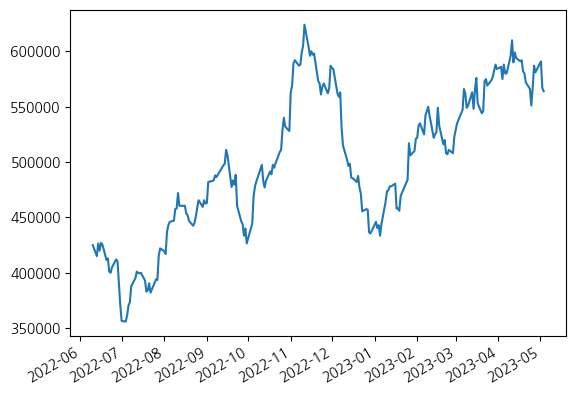

In [ ]:
# 삼성전자 종가 그래프 
stocks_data['LG에너지솔루션']['Close'].plot();

In [ ]:
stocks_data['SK하이닉스']

,Open,High,Low,Volume,Change,감정상태,Close
2022-06-10,104000,104500,102500,3480289,-0.018957,1.0,103500
2022-06-13,100000,101000,99000,4133447,-0.043478,1.0,99000
2022-06-14,96900,99600,96800,3242550,0.001010,2.0,99100
2022-06-15,98500,98900,96700,2578500,-0.012109,1.0,97900
2022-06-16,99900,101500,97100,3810703,-0.005107,1.0,97400
...,...,...,...,...,...,...,...
2023-04-27,87900,89200,86000,2980163,0.016018,2.0,88800
2023-04-28,90800,91400,88700,3737493,0.007883,2.0,89500
2023-05-02,90900,90900,88900,2427349,0.007821,0.0,90200
2023-05-03,89000,90300,88600,1779615,-0.004435,0.0,89800


In [ ]:
test = stocks_data.copy()

In [ ]:
test['LG에너지솔루션'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2022-06-10 to 2023-05-04
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    225 non-null    int64  
 1   High    225 non-null    int64  
 2   Low     225 non-null    int64  
 3   Volume  225 non-null    int64  
 4   Change  225 non-null    float64
 5   감정상태    225 non-null    float64
 6   Close   225 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 14.1 KB


## train, valid, test 데이터셋 나누기

In [ ]:
# 전체 데이터 셋의 80프로 
TRAIN_SPLIT = 0.8  

# 나머지 데이터 셋의 50프로 
VAL_TEST_SPLIT = 0.5  

total_count = len(stocks_data[list(stocks_data.keys())[0]])
train_count = int(total_count * TRAIN_SPLIT)
left = total_count - train_count
valid_count = int(left * VAL_TEST_SPLIT)
test_count = int(left - valid_count)

print(sum([train_count, valid_count, test_count]))
total_count, train_count, valid_count, test_count

225


(225, 180, 22, 23)

## 각 종목별 데이터 셋 만들기

In [ ]:
pick_columns = {'Open', 'High', 'Low', 'Volume', 'Change', '감정상태', 'Close'}

y_column = {'Close'}
x_columns = pick_columns - y_column

In [ ]:
# 각 주식 종목의 x, y, x_train, y_train, x_valid, y_valid, x_test, y_test 값 저장
 
for i, (ticker, df) in enumerate(stocks_data.items()):
    new_data = pd.DataFrame(df, columns=list(pick_columns)).interpolate(limit_direction='both')
    x_df = pd.DataFrame(new_data, columns=list(x_columns))
    y_df = pd.DataFrame(new_data, columns=list(y_column))

    # 딕션너리 형태로 저장 
    stocks_data[ticker] = {
        'x': x_df, 'y': y_df,
        'x_train': x_df[0:train_count], 'y_train': y_df[0:train_count],
        'x_valid': x_df[train_count:train_count+valid_count], 'y_valid': y_df[train_count:train_count+valid_count],
        'x_test': x_df[train_count+valid_count:], 'y_test': y_df[train_count+valid_count:],
        'new_data': new_data

        }


## 데이터 살펴보기

In [ ]:
stocks_data

{'LG에너지솔루션': {'x':                Low  Volume    High  감정상태    Change    Open
  2022-06-10  412500  285077  426000   0.0  0.005917  418000
  2022-06-13  413500  267003  420500   1.0 -0.023529  414000
  2022-06-14  410500  417106  432500   1.0  0.027711  411000
  2022-06-15  417000  275832  427500   1.0 -0.015240  426000
  2022-06-16  424500  365836  439500   0.0  0.016667  424500
  ...            ...     ...     ...   ...       ...     ...
  2023-04-27  567000  463287  588000   1.0  0.035273  573000
  2023-04-28  573000  316880  591000   1.0 -0.010221  590000
  2023-05-02  579000  273527  592000   1.0  0.017212  580000
  2023-05-03  566000  243943  587000   1.0 -0.040609  587000
  2023-05-04  560000  243140  571000   1.0 -0.005291  563000
  
  [225 rows x 6 columns],
  'y':              Close
  2022-06-10  425000
  2022-06-13  415000
  2022-06-14  426500
  2022-06-15  420000
  2022-06-16  427000
  ...            ...
  2023-04-27  587000
  2023-04-28  581000
  2023-05-02  591000
  2023-

In [ ]:
stocks_data['LG에너지솔루션']['x']

,Low,Volume,High,감정상태,Change,Open
2022-06-10,412500,285077,426000,0.0,0.005917,418000
2022-06-13,413500,267003,420500,1.0,-0.023529,414000
2022-06-14,410500,417106,432500,1.0,0.027711,411000
2022-06-15,417000,275832,427500,1.0,-0.015240,426000
2022-06-16,424500,365836,439500,0.0,0.016667,424500
...,...,...,...,...,...,...
2023-04-27,567000,463287,588000,1.0,0.035273,573000
2023-04-28,573000,316880,591000,1.0,-0.010221,590000
2023-05-02,579000,273527,592000,1.0,0.017212,580000
2023-05-03,566000,243943,587000,1.0,-0.040609,587000


In [ ]:
stocks_data['SK하이닉스']['y']

,Close
2022-06-10,103500
2022-06-13,99000
2022-06-14,99100
2022-06-15,97900
2022-06-16,97400
...,...
2023-04-27,88800
2023-04-28,89500
2023-05-02,90200
2023-05-03,89800


In [ ]:
from numpy import hstack
from keras.utils import timeseries_dataset_from_array
from keras.preprocessing.sequence import TimeseriesGenerator

for i, (ticker, ds) in enumerate(stocks_data.items()):
    x_series = []
    y_series = []
    x_train_series = []
    y_train_series = []
    x_valid_series = []
    y_valid_series = []
    x_test_series = []
    y_test_series = []
    
    # 값만 저장 
    ds['x_values'] = ds['x'].values
    ds['y_values'] = ds['y'].values
    
    ds['x_train_values'] = ds['x_train'].values
    ds['y_train_values'] = ds['y_train'].values
    
    ds['x_valid_values'] = ds['x_valid'].values
    ds['y_valid_values'] = ds['y_valid'].values
    
    ds['x_test_values'] = ds['x_test'].values
    ds['y_test_values'] = ds['y_test'].values
    
    # 생성된 값 리스트에 더하기 
    x_series.append(ds['x_values'])
    y_series.append(ds['y_values'])
    
    x_train_series.append(ds['x_train_values'])
    y_train_series.append(ds['y_train_values'])
    
    x_valid_series.append(ds['x_valid_values'])
    y_valid_series.append(ds['y_valid_values'])
    
    x_test_series.append(ds['x_test_values'])
    y_test_series.append(ds['y_test_values'])
    

    x_dataset = hstack(tuple(x_series))
    y_dataset = hstack(tuple(y_series))

    x_train_dataset = hstack(tuple(x_train_series))
    y_train_dataset = hstack(tuple(y_train_series))

    x_valid_dataset = hstack(tuple(x_valid_series))
    y_valid_dataset = hstack(tuple(y_valid_series))

    x_test_dataset = hstack(tuple(x_test_series))
    y_test_dataset = hstack(tuple(y_test_series))

    # MinMax 스케일링 정용 
    x_scaler = MinMaxScaler(feature_range=(0, 1))
    y_scaler = MinMaxScaler(feature_range=(0, 1))

    x_dataset = x_scaler.fit_transform(x_dataset)
    y_dataset = y_scaler.fit_transform(y_dataset)
    
    # Scale train and validation datasets
    x_train_dataset = x_scaler.transform(x_train_dataset)
    y_train_dataset = y_scaler.transform(y_train_dataset)

    x_valid_dataset = x_scaler.transform(x_valid_dataset)
    y_valid_dataset = y_scaler.transform(y_valid_dataset)

    x_test_dataset = x_scaler.transform(x_test_dataset)
    y_test_dataset = y_scaler.transform(y_test_dataset)
    
    ds['x_train_dataset'] = x_train_dataset
    ds['y_train_dataset'] = y_train_dataset
    
    ds['x_valid_dataset'] = x_valid_dataset
    ds['y_valid_dataset'] = y_valid_dataset
    
    ds['x_test_dataset'] = x_test_dataset
    ds['y_test_dataset'] = y_test_dataset

    # Store feature scalers
    ds['x_scaler'] = x_scaler
    ds['y_scaler'] = y_scaler

    print('*' * 5 + 'Train shapes for ' + ticker)
    print(x_train_dataset.shape, y_train_dataset.shape) 
    
    print('*' * 5 + 'Validation shapes for ' + ticker)
    print(x_valid_dataset.shape, y_valid_dataset.shape) 
    
    print('*' * 5 + 'Test shapes for ' + ticker)
    print(x_test_dataset.shape, y_test_dataset.shape) 

*****Train shapes for LG에너지솔루션
(180, 6) (180, 1)
*****Validation shapes for LG에너지솔루션
(22, 6) (22, 1)
*****Test shapes for LG에너지솔루션
(23, 6) (23, 1)
*****Train shapes for SK하이닉스
(180, 6) (180, 1)
*****Validation shapes for SK하이닉스
(22, 6) (22, 1)
*****Test shapes for SK하이닉스
(23, 6) (23, 1)
*****Train shapes for 삼성바이오로직스
(180, 6) (180, 1)
*****Validation shapes for 삼성바이오로직스
(22, 6) (22, 1)
*****Test shapes for 삼성바이오로직스
(23, 6) (23, 1)
*****Train shapes for LG화학
(180, 6) (180, 1)
*****Validation shapes for LG화학
(22, 6) (22, 1)
*****Test shapes for LG화학
(23, 6) (23, 1)
*****Train shapes for 삼성SDI
(180, 6) (180, 1)
*****Validation shapes for 삼성SDI
(22, 6) (22, 1)
*****Test shapes for 삼성SDI
(23, 6) (23, 1)
*****Train shapes for 기아
(180, 6) (180, 1)
*****Validation shapes for 기아
(22, 6) (22, 1)
*****Test shapes for 기아
(23, 6) (23, 1)
*****Train shapes for NAVER
(180, 6) (180, 1)
*****Validation shapes for NAVER
(22, 6) (22, 1)
*****Test shapes for NAVER
(23, 6) (23, 1)
*****Train shapes for POS

In [ ]:
window_length = 1
BATCH_SIZE = 1

for i, (ticker, ds) in enumerate(stocks_data.items()):
    x_train_dataset = ds['x_train_dataset']
    y_train_dataset = ds['y_train_dataset']
    
    x_valid_dataset = ds['x_valid_dataset']
    y_valid_dataset = ds['y_valid_dataset']
    
    x_test_dataset = ds['x_test_dataset']
    y_test_dataset = ds['y_test_dataset']
    
    train_generator = TimeseriesGenerator(x_train_dataset, y_train_dataset, length=window_length, batch_size=BATCH_SIZE)
    print('Train samples for {}: {}'.format(ticker, len(train_generator)))

    valid_generator = TimeseriesGenerator(x_valid_dataset, y_valid_dataset, length=window_length, batch_size=BATCH_SIZE)
    print('Validation samples for {}: {}'.format(ticker, len(valid_generator)))

    test_generator = TimeseriesGenerator(x_test_dataset, y_test_dataset, length=window_length, batch_size=BATCH_SIZE)
    print('Test samples for {}: {}'.format(ticker, len(test_generator)))
    
    ds['train_generator'] = train_generator
    ds['valid_generator'] = valid_generator
    ds['test_generator'] = test_generator


Train samples for LG에너지솔루션: 179
Validation samples for LG에너지솔루션: 21
Test samples for LG에너지솔루션: 22
Train samples for SK하이닉스: 179
Validation samples for SK하이닉스: 21
Test samples for SK하이닉스: 22
Train samples for 삼성바이오로직스: 179
Validation samples for 삼성바이오로직스: 21
Test samples for 삼성바이오로직스: 22
Train samples for LG화학: 179
Validation samples for LG화학: 21
Test samples for LG화학: 22
Train samples for 삼성SDI: 179
Validation samples for 삼성SDI: 21
Test samples for 삼성SDI: 22
Train samples for 기아: 179
Validation samples for 기아: 21
Test samples for 기아: 22
Train samples for NAVER: 179
Validation samples for NAVER: 21
Test samples for NAVER: 22
Train samples for POSCO홀딩스: 179
Validation samples for POSCO홀딩스: 21
Test samples for POSCO홀딩스: 22
Train samples for 포스코퓨처엠: 179
Validation samples for 포스코퓨처엠: 21
Test samples for 포스코퓨처엠: 22
Train samples for 셀트리온: 179
Validation samples for 셀트리온: 21
Test samples for 셀트리온: 22
Train samples for 현대모비스: 179
Validation samples for 현대모비스: 21
Test samples for 현대모비스: 22
Tra

In [ ]:
# window_length = 10
# BATCH_SIZE = int(window_length / 2)

# for i, (ticker, ds) in enumerate(stocks_data.items()):
#     x_train_dataset = ds['x_train_dataset']
#     y_train_dataset = ds['y_train_dataset']
    
#     x_valid_dataset = ds['x_valid_dataset']
#     y_valid_dataset = ds['y_valid_dataset']
    
#     x_test_dataset = ds['x_test_dataset']
#     y_test_dataset = ds['y_test_dataset']
    
#     train_generator = timeseries_dataset_from_array(x_train_dataset, y_train_dataset, sequence_length=window_length, batch_size=BATCH_SIZE)
#     print('Train samples for {}: {}'.format(ticker, len(train_generator)))

#     valid_generator = timeseries_dataset_from_array(x_valid_dataset, y_valid_dataset, sequence_length=window_length, batch_size=BATCH_SIZE)
#     print('Validation samples for {}: {}'.format(ticker, len(valid_generator)))

#     test_generator = timeseries_dataset_from_array(x_test_dataset, y_test_dataset, sequence_length=window_length, batch_size=BATCH_SIZE)
#     print('Test samples for {}: {}'.format(ticker, len(test_generator)))
    
#     ds['train_generator'] = train_generator
#     ds['valid_generator'] = valid_generator
#     ds['test_generator'] = test_generator

In [ ]:
count = 0

for i, (ticker, ds) in enumerate(stocks_data.items()):
    train_generator = ds['train_generator']
    valid_generator = ds['valid_generator']
    test_generator = ds['test_generator']

    x_scaler = ds['x_scaler']
    y_scaler = ds['y_scaler']

    OUTPUT_SIZE = 1

    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(window_length, OUTPUT_SIZE * len(x_columns))))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(OUTPUT_SIZE))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    # fit
    model.fit(train_generator)

    # val_loss = model.evaluate_generator(valid_generator)
    # print('Val loss for {}: {}'.format(ticker, val_loss))

    
    # Make test predictions
    test_predict = model.predict_generator(test_generator)
    predicted_df = pd.DataFrame(y_scaler.inverse_transform(test_predict))
    predicted_df = predicted_df.rename(columns={0: ticker})
    
    original_test = stocks_data[ticker]['y_test'].iloc[window_length:]
    predicted_df.index = original_test.index
    
    if count > 0:
        predicted_ticker = pd.concat([predicted_df[ticker], predicted_ticker], axis=1)
    else: 
        predicted_ticker = predicted_df[ticker]
        
    count += 1

179/179 [==============================] - 6s 6ms/step - loss: 0.0630


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 6s 5ms/step - loss: 0.0632


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 5s 5ms/step - loss: 0.0647


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 7s 5ms/step - loss: 0.0388


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 5s 5ms/step - loss: 0.0546


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 5s 4ms/step - loss: 0.0624


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 8s 14ms/step - loss: 0.0766


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 6s 6ms/step - loss: 0.0222


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 7s 4ms/step - loss: 0.0130


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 6s 7ms/step - loss: 0.0050


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 5s 5ms/step - loss: 0.0497


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 7s 5ms/step - loss: 0.0440


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 5s 7ms/step - loss: 0.0982


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 5s 5ms/step - loss: 0.0566


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 7s 5ms/step - loss: 0.0027


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 6s 7ms/step - loss: 0.0501


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 5s 5ms/step - loss: 0.0357


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 6s 5ms/step - loss: 0.0332


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 6s 7ms/step - loss: 0.0251


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 6s 5ms/step - loss: 0.0684


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 6s 5ms/step - loss: 0.0596


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 6s 7ms/step - loss: 0.0762


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 6s 5ms/step - loss: 0.0189


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 5s 5ms/step - loss: 0.0598


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 6s 7ms/step - loss: 0.0665


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


179/179 [==============================] - 6s 5ms/step - loss: 0.0478


<ipython-input-130-50fbd2aafaf8>:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predict = model.predict_generator(test_generator)


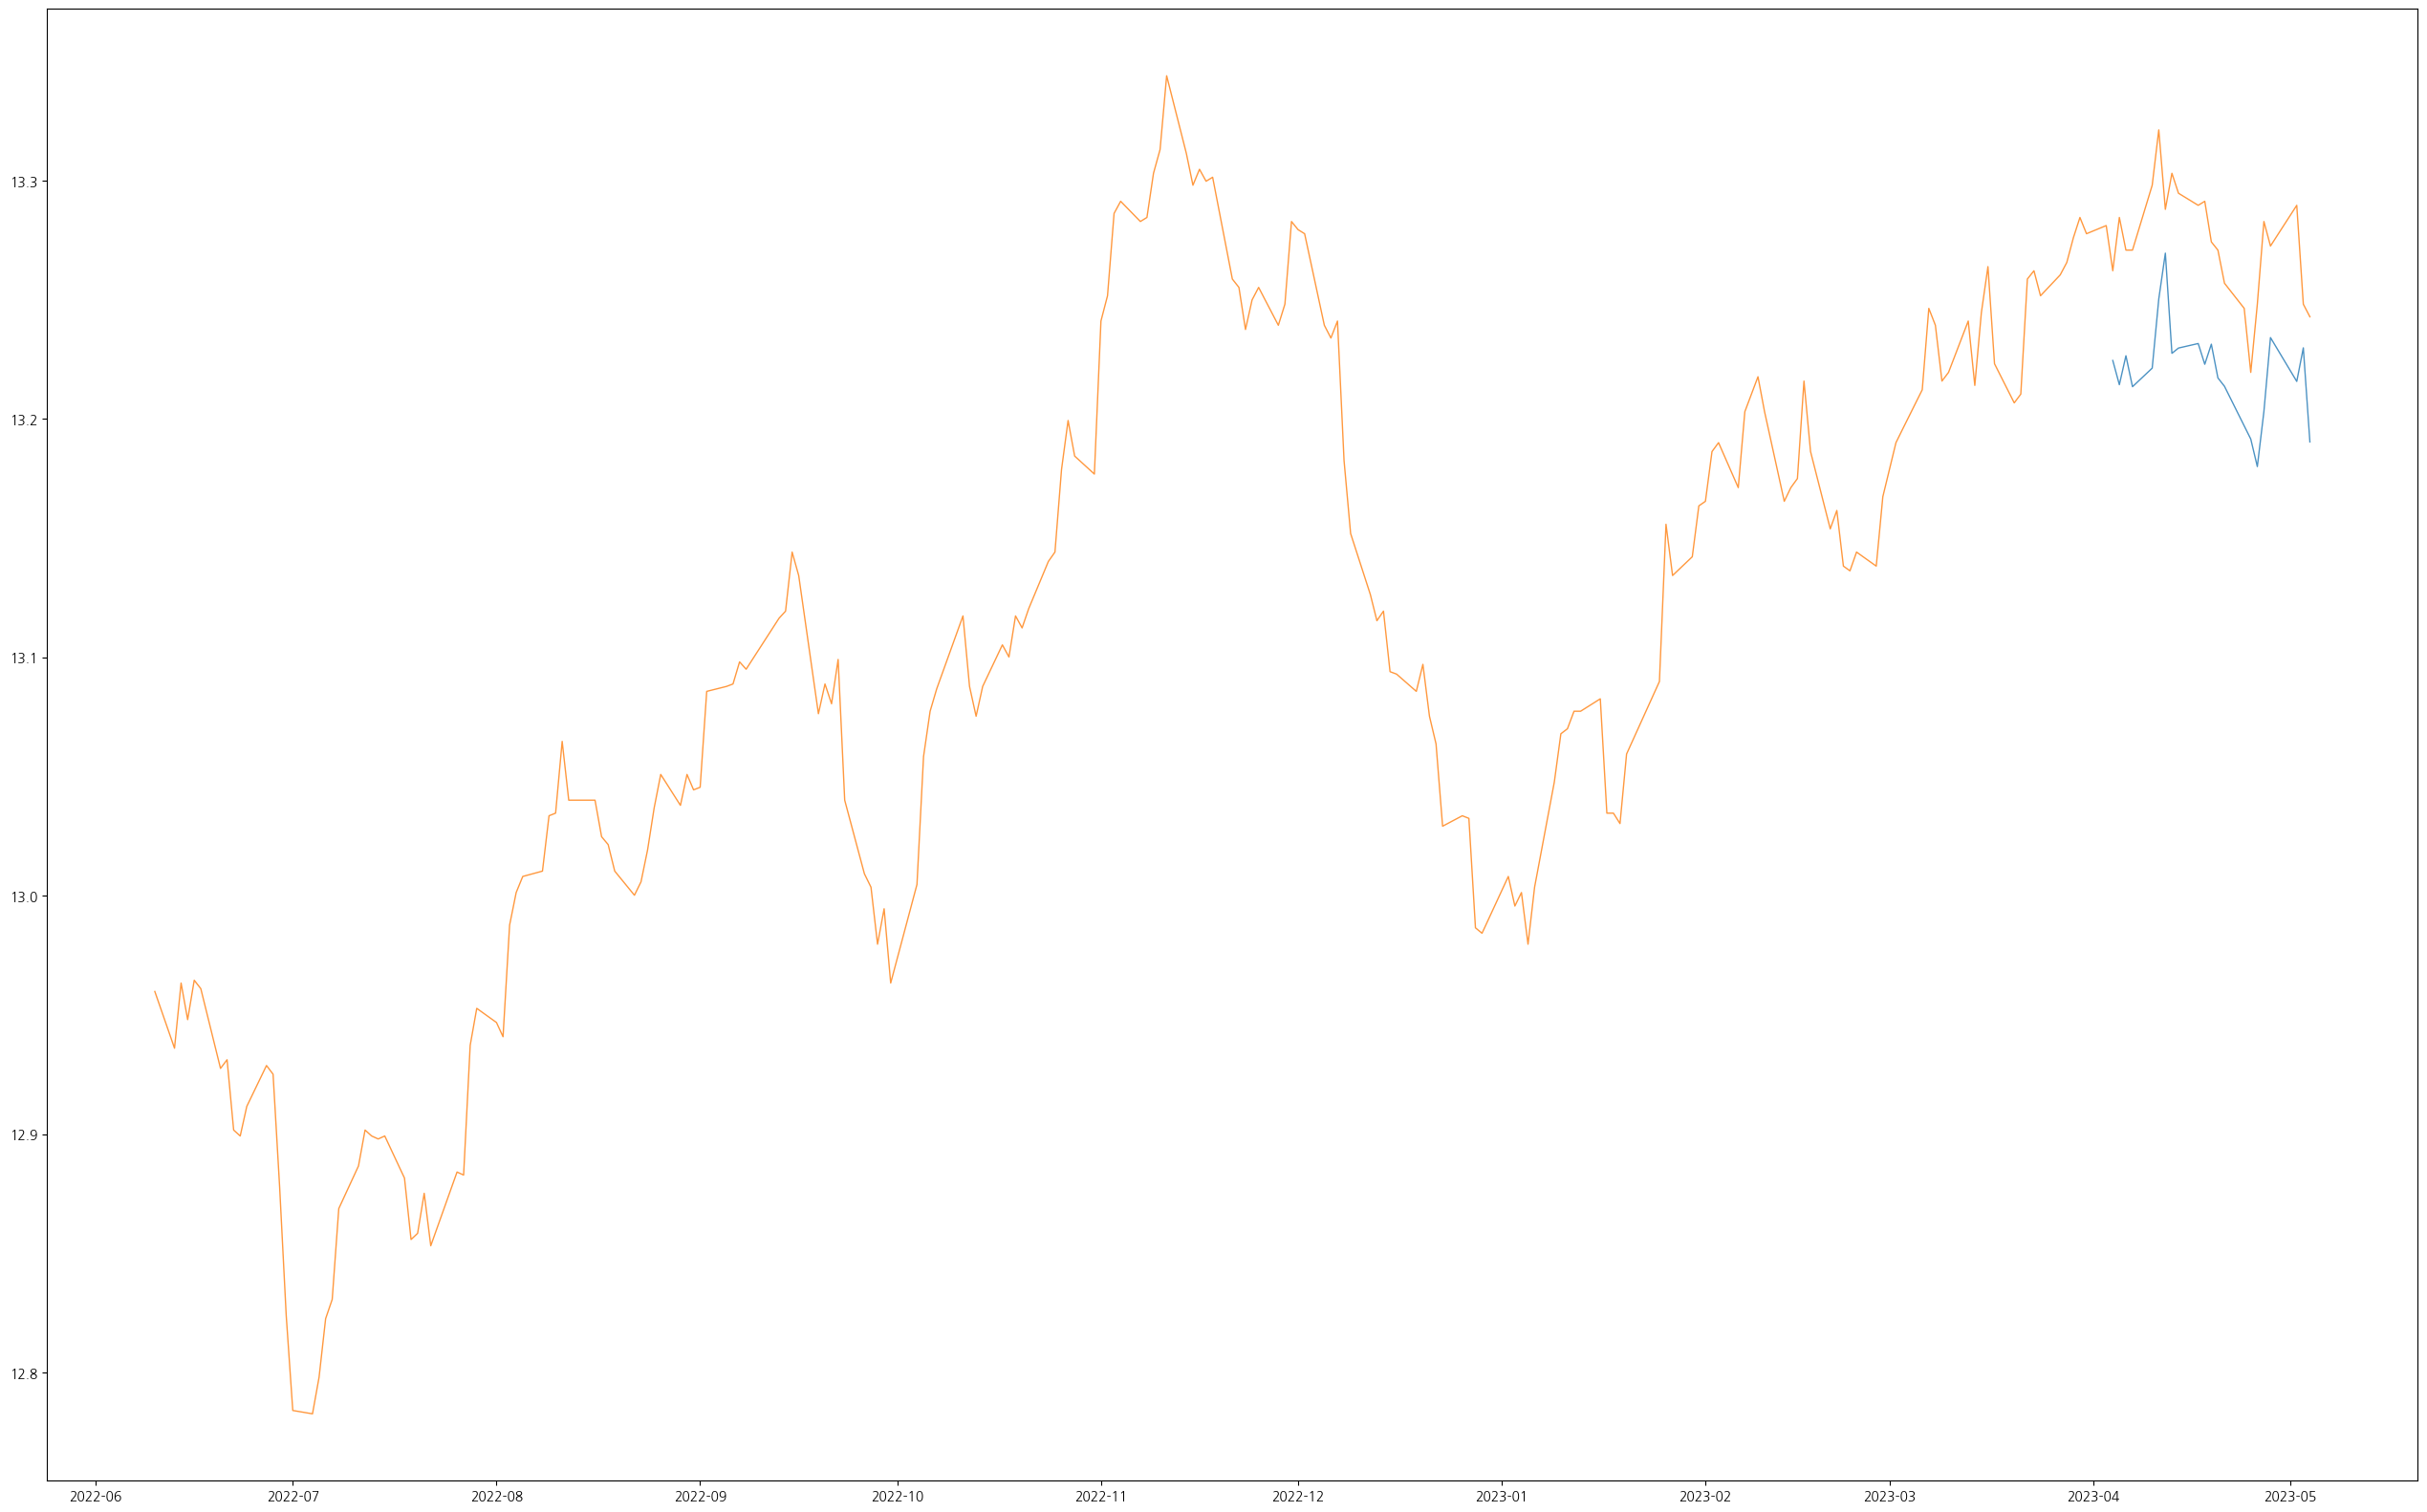

In [ ]:
# 예측 데이터와 실제 데이터값 비교 
%matplotlib inline
plt.figure(figsize=(32, 20))

plt.plot(np.log(predicted_ticker['LG에너지솔루션']), linewidth=1, alpha=0.8)
plt.plot(np.log(stocks_data['LG에너지솔루션']['y']), linewidth=1, alpha=0.8)
plt.show()

In [ ]:
stocks_data['삼성SDI']['y'][100:]

,Close
2022-11-04,733000
2022-11-07,740000
2022-11-08,730000
2022-11-09,738000
2022-11-10,725000
...,...
2023-04-27,706000
2023-04-28,691000
2023-05-02,700000
2023-05-03,684000


In [ ]:
stocks_data['SK하이닉스']['y']

,Close
2022-06-10,103500
2022-06-13,99000
2022-06-14,99100
2022-06-15,97900
2022-06-16,97400
...,...
2023-04-27,88800
2023-04-28,89500
2023-05-02,90200
2023-05-03,89800


In [ ]:
stocks_data['SK하이닉스']['y']

,Close
2022-06-10,103500
2022-06-13,99000
2022-06-14,99100
2022-06-15,97900
2022-06-16,97400
...,...
2023-04-27,88800
2023-04-28,89500
2023-05-02,90200
2023-05-03,89800


,Close
2023-04-18,87600
2023-04-19,88200
2023-04-20,87700
2023-04-21,89100
2023-04-24,87200
2023-04-25,85500
2023-04-26,87400
2023-04-27,88800
2023-04-28,89500
2023-05-02,90200


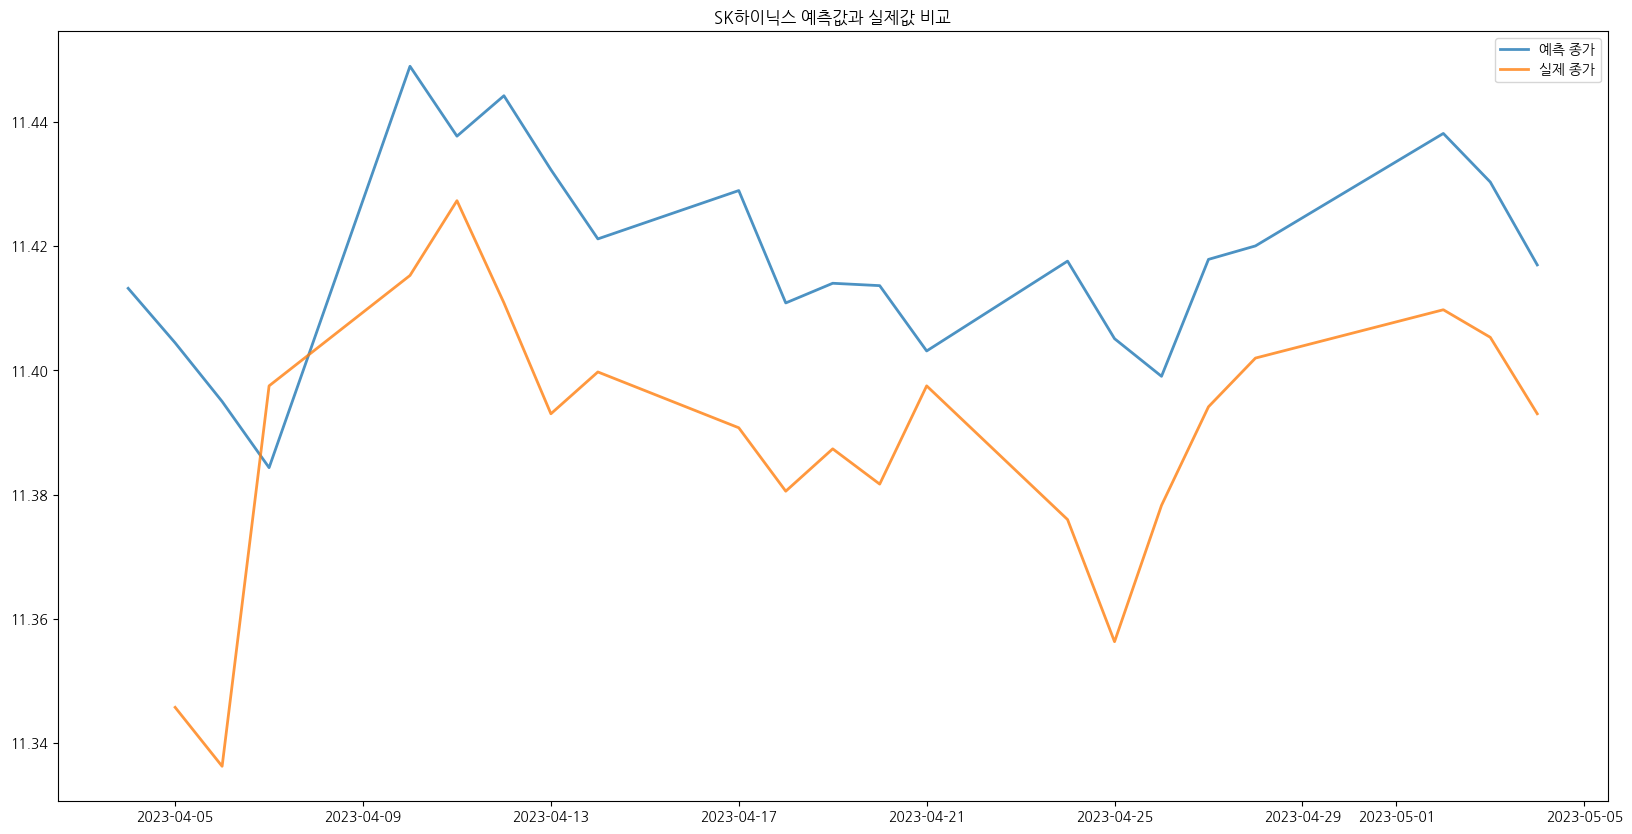

In [ ]:
# 예측 데이터와 실제 데이터₩ㅁ값 비교 
%matplotlib inline
plt.figure(figsize=(20, 10))
plt.plot(np.log(predicted_ticker['SK하이닉스']), linewidth=2, alpha=0.8, label='예측 종가')
plt.plot(np.log(stocks_data['SK하이닉스']['y'][stocks_data['SK하이닉스']['y'].index > '2023-04-04']),
         linewidth=2, alpha=0.8, label='실제 종가')
plt.legend()
plt.title('SK하이닉스 예측값과 실제값 비교')
plt.show()

In [ ]:
# 1년치 감정분석으로는 모델을 설정하기 쉽지 않음 
predicted_ticker.to_csv('주식_예측값.csv')

In [ ]:
predicted_ticker

,SK텔레콤,삼성화재,카카오뱅크,KT&G,SK,하이브,한국전력,하나금융지주,삼성생명,LG,...,셀트리온,포스코퓨처엠,POSCO홀딩스,NAVER,기아,삼성SDI,LG화학,삼성바이오로직스,SK하이닉스,LG에너지솔루션
2023-04-04,62313.539062,85198.703125,187608.203125,174041.765625,18725.513672,41645.785156,65176.242188,81191.164062,178467.750000,35797.984375,...,149697.125000,260685.250000,374055.84375,206603.718750,79248.960938,709862.3125,694963.1250,809216.8125,90512.242188,553761.2500
2023-04-05,62863.308594,85390.703125,189849.906250,176512.390625,18640.533203,41967.652344,65346.050781,81832.921875,179527.968750,36142.171875,...,145233.078125,257985.109375,356233.18750,206958.781250,78393.515625,698738.4375,701116.3125,810912.6875,89719.875000,548165.0625
2023-04-06,63411.167969,85394.570312,192619.328125,176645.328125,18699.908203,41969.031250,64611.078125,81975.976562,177170.031250,35707.820312,...,148774.109375,256264.437500,349218.84375,206091.437500,79285.460938,729149.5625,695895.1875,810941.3750,88876.023438,554860.9375
2023-04-07,64840.660156,85370.460938,190416.781250,184062.312500,18758.197266,41341.039062,64922.003906,81665.046875,175098.968750,35665.664062,...,152238.296875,255178.031250,342726.25000,200769.500000,80322.234375,717643.0000,690544.5000,827434.6875,87932.867188,547700.2500
2023-04-10,64245.214844,84974.148438,189535.750000,188538.515625,18756.183594,41452.746094,63967.269531,81795.960938,179838.812500,35536.324219,...,154747.828125,259077.500000,345664.31250,202653.203125,78938.656250,704992.3750,686809.4375,817944.1875,93810.859375,551986.6250
2023-04-11,65049.003906,84723.992188,189155.968750,197038.953125,18789.123047,41543.335938,64008.566406,81736.953125,187149.093750,36014.722656,...,180366.203125,273459.062500,383185.09375,201759.109375,78745.765625,714997.4375,711452.9375,819898.5625,92760.023438,568234.4375
2023-04-12,66710.210938,84523.578125,190759.234375,197965.984375,18905.832031,41929.628906,64491.332031,82119.976562,193017.515625,36004.242188,...,171708.734375,274291.687500,367452.81250,205444.812500,83024.929688,732340.2500,772144.0625,827390.0625,93366.343750,579260.8750
2023-04-13,73670.468750,84628.250000,195435.953125,203071.343750,19050.794922,42283.011719,65181.644531,85378.453125,187339.453125,35624.144531,...,165026.031250,273526.218750,393920.71875,204679.156250,84639.609375,729895.1875,743678.9375,821136.0000,92259.781250,555425.3750
2023-04-14,76707.531250,84896.296875,192064.765625,209179.609375,19109.812500,41892.734375,65342.953125,86858.093750,182964.656250,36161.007812,...,159594.546875,261572.156250,356177.21875,204045.531250,83563.093750,716185.1875,741406.6875,826355.9375,91236.195312,556656.6875
2023-04-17,72894.593750,85235.226562,193877.031250,216850.250000,19108.046875,42912.433594,66012.335938,85023.546875,184553.937500,35950.070312,...,162246.531250,303817.125000,387712.96875,206424.906250,82989.507812,719784.5625,754377.6250,831958.1250,91950.109375,557715.7500


In [ ]:
stocks_data['LG화학']['x']

,Low,Volume,High,감정상태,Change,Open
2022-06-10,573000,239123,589000,1.0,-0.010187,588000
2022-06-13,556000,209761,574000,1.0,-0.036021,574000
2022-06-14,548000,247673,568000,1.0,0.003559,558000
2022-06-15,558000,199680,570000,1.0,-0.005319,562000
2022-06-16,570000,327560,597000,1.0,0.040998,586000
...,...,...,...,...,...,...
2023-04-27,726000,315286,747000,1.0,0.019257,734000
2023-04-28,730000,257164,750000,0.0,-0.001350,746000
2023-05-02,738000,203437,760000,0.0,0.008108,750000
2023-05-03,726000,159157,742000,0.0,-0.026810,741000
